# [[공빅데] seaborn으로 그래프 그리기](https://cafe.naver.com/21pbds)

[참고](https://wonhwa.tistory.com/32)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

### step1. 밀집도 그래프, 히스토그램

seaborn 라이브러리에서는 distplot을 이용하면 히스토그램과 밀집도 그래프를 동시에 그릴 수 있다.  
고객의 매장 구매량 정보를 히스토그램 및 밀집도 그래프로 시각화한다.

In [4]:
#데이터 셋 불러오기
df = pd.read_csv('pydata/marketing_campaign.csv',sep='\t')

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


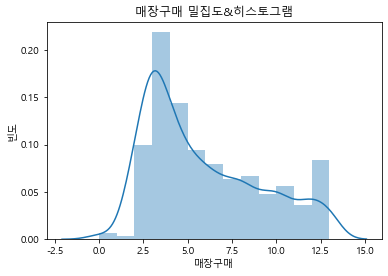

In [3]:
### seaborn으로 그래프 그리기 ###
## 밀집도 그래프와 히스토그램 같이 그리기 ##
# 그래프 바탕 생성
ax = plt.subplot()

# 밀집도 그래프 없애려면 kde=False 추가, 밀집도만 남기려면 hist=False 추가
ax = sns.distplot(df['NumStorePurchases'],kde=True,hist=True,bins=13)

# 제목 생성
ax.set_title('매장구매 밀집도&히스토그램')

# x라벨
ax.set_xlabel('매장구매')

# y라벨
ax.set_ylabel('빈도')

# 그래프 popup
plt.show()

히스토그램 그래프만 남기고 싶으면 sns.distplot(kde = False)로 바꾸어 준다.  
밀집도만 남기고 싶을 때는 sns.distplot(hist = False)로 바꾸어 준다.  
또 seaborn에서는 rug 그래프(양탄자 그래프)를 그려 데이터의 밀집 정도를 확인할 수 있다.

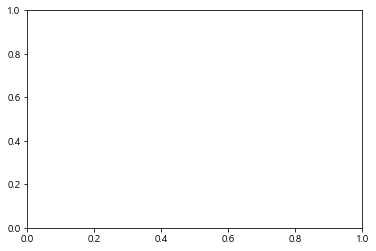

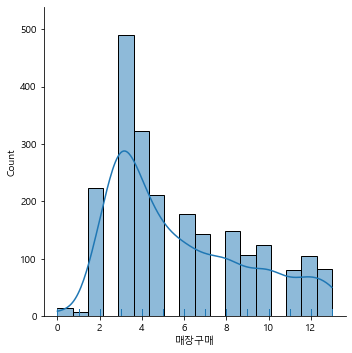

In [4]:
# rug 추가
ax1 = plt.subplots()
ax1 = sns.displot(df['NumStorePurchases'],kde = True,rug=True)
ax1.set_titles('매장구매 히스토그램 양탄자그래프')
ax1.set_xlabels('매장구매')
plt.show()

### step2. count 그래프

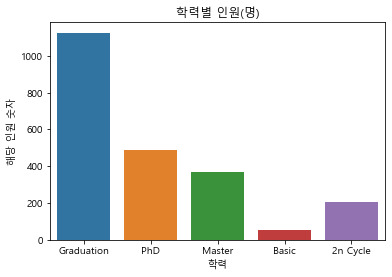

In [5]:
## count 그래프 그리기(이산값) ##
ax2 = plt.subplots()
ax2 = sns.countplot(x='Education', data = df)
ax2.set_title('학력별 인원(명)')
ax2.set_xlabel('학력')
ax2.set_ylabel('해당 인원 숫자')
plt.show()

### step3. 산점도 그래프

산점도는 regplot을 이용하여 그릴 수 있다.  
육류구매량을 x, 와인구매량을 y로 하여 산점도를 그린다.

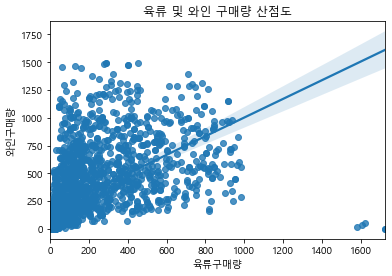

In [6]:
##이변량그래프 그리기##
# 산점도 그래프 그리기
ax3 = plt.subplots()
ax3 = sns.regplot(x='MntMeatProducts', y = 'MntWines', data=df, fit_reg=True) # 회귀선 제거시 fig_reg = False
ax3.set_title('육류 및 와인 구매량 산점도')
ax3.set_xlabel('육류구매량')
ax3.set_ylabel('와인구매량')
plt.show()

regplot은 회귀선까지 같이 그려지는데 회귀선을 제거하고 싶으면  
sns.regplot(fit_reg = False)로 바꿔준다.  
또한 jointplot을 사용하여 산점도와 히스토그램을 동시에 그릴 수도 있다.

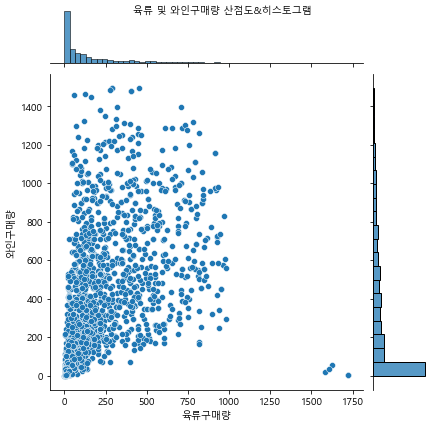

In [7]:
# 산점도&히스토그램 그리기
joint = sns.jointplot(x='MntMeatProducts', y='MntWines', data=df)
joint.set_axis_labels(xlabel='육류구매량', ylabel='와인구매량')
joint.fig.suptitle('육류 및 와인구매량 산점도&히스토그램', fontsize=10)
plt.show()

### step4. 육각 그래프

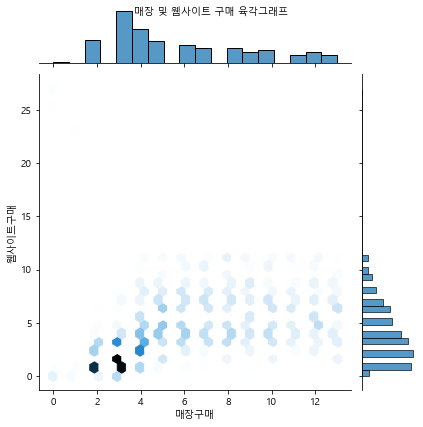

In [8]:
#육각그래프 그리기
hexbin = sns.jointplot(x='NumStorePurchases', y='NumWebPurchases', data=df, kind='hex')
hexbin.set_axis_labels(xlabel='매장구매',ylabel='웹사이트구매')
hexbin.fig.suptitle('매장 및 웹사이트 구매 육각그래프',fontsize=10)
plt.show()

### step5. 이차원 밀집도

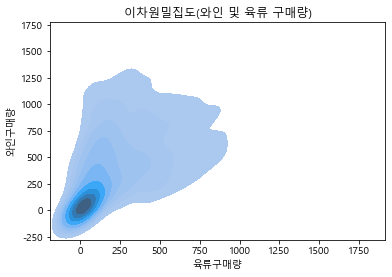

In [9]:
ax4 = plt.subplots()
ax4 = sns.kdeplot(x = df['MntMeatProducts'], y = df['MntWines'], shade = True) # shade = True: 음영효과 설정
ax4.set_title('이차원밀집도(와인 및 육류 구매량)')
ax4.set_xlabel('육류구매량')
ax4.set_ylabel('와인구매량')
plt.show()

### step5. 관계 그래프

seaborn으로는 여러 그래프를 한 번에 확인할 수 있는 관계 그래프를 그릴 수 있다.  
seaborn의 pairplot을 사용하여 그릴 수 있는데, map_upper은 대각선 위 3개 그래프, map_lower은 대각선 아래 3개 그래프, map_diag는 대각선상에 있는 나머지3개의 그래프를 지정하여 만들 수 있다.

여기서는 대각선 위의 그래프는 산점도로, 아래는 밀집도 그래프로, 나머지 대각선은 히스토그램으로 관계 그래프를 그려 본다.  
원본 데이터셋의 열이 너무 많기 때문에, 육류구매량, 와인구매량, 웹사이트 구매량의 3변수만 뽑아내어 관계 그래프로 시각화한다.

In [7]:
df2 = df.loc[:, ['MntMeatProducts','MntWines','NumWebPurchases']]
print(df2.head())

   MntMeatProducts  MntWines  NumWebPurchases
0              546       635                8
1                6        11                1
2              127       426                8
3               20        11                2
4              118       173                5


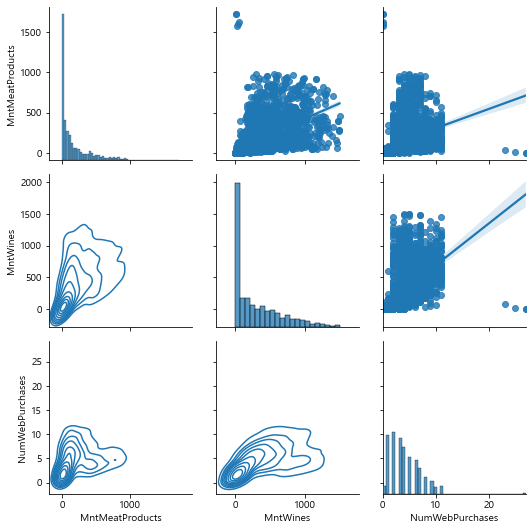

In [9]:
# 관계 그래프 그리기
pair_grid = sns.PairGrid(df2)
pair_grid = pair_grid.map_upper(sns.regplot) # 대각선 윗부분
pair_grid = pair_grid.map_lower(sns.kdeplot) # 대각선 아랫부분
pair_grid = pair_grid.map_diag(sns.histplot) # 대각선 중심
plt.show()